In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
from functools import reduce
import sys
sys.path.append(os.environ['ROOT_DIR'])
from setting import *

import matplotlib.pylab as plt
import pandas as pd
import random
import seaborn as sns
from tqdm import *
import numpy as np

from src.data.helper import *
from src.visualization.visualize import MailCenter,RoyalMail

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Explore the whole dataset 

In [2]:
rm = RoyalMail()

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 94/103 [00:38<00:03,  2.47it/s]


In [5]:
rm.summary_table.reset_index().stream.unique()

array(['T0001', 'T0003', 'T0030', 'T0064', 'T0076', 'T0079', 'T0092',
       'T0093', 'T0094', 'T0095', 'T0041'], dtype=object)

In [7]:
rm.summary_table

cnt_mean   cnt_max  cnt_min  \
MC                     DO          stream                                    
aberdeen mail centre   altens do   T0001    5218.440000   26849.0      0.0   
                                   T0003    2420.009655    6377.0      0.0   
                                   T0030    9479.051105   23377.0      0.0   
                                   T0064     316.096953    1772.0      0.0   
                                   T0076   33286.088276   71242.0      0.0   
                                   T0079     455.915978    2337.0      0.0   
                                   T0092    1559.787293    4221.0      0.0   
                                   T0093    2161.831492    5770.0      0.0   
                                   T0094     377.247238    1090.0      0.0   
                                   T0095     279.935083     811.0      0.0   
                       banchory do T0001    1515.128276   20289.0      0.0   
                                   T0003    2316.907586    9396.0      0.0   
                                   T0030    2504.794199    7384.0      0.0   
                                   T0064      39.141470     142.0      0.0   
                                   T0076    5601.533128   19801.0      0.0   
                                   T0079     152.786207     520.0      0.0   
                                   T0092     331.441989    1041.0      0.0   
                                   T0093     458.890884    1423.0      0.0   
                                   T0094      79.870166     269.0      0.0   
                                   T0095      58.918508     201.0      0.0   
                       banff do    T0001    1127.761379   19043.0      0.0   
                                   T0003    1940.382069    9119.0      0.0   
                                   T0030    1902.874309    7479.0      0.0   
                                   T0064      38.859748     139.0      0.0   
                                   T0076    5330.873476   14837.0      0.0   
                                   T0079     116.895172     388.0      0.0   
                                   T0092     312.886740     963.0      0.0   
                                   T0093     432.477901    1316.0      0.0   
                                   T0094      75.370166     248.0      0.0   
                                   T0095      55.279006     149.0      0.0   
...                                                 ...       ...      ...   
warrington mail centre wigan do    T0003    2770.831724   17495.0      0.0   
                                   T0030   18965.736264   59106.0      0.0   
                                   T0041    5674.430962   13547.0      0.0   
                                   T0064     388.431564    1244.0      0.0   
                                   T0076   85310.655172  179859.0      0.0   
                                   T0079     687.322268    3323.0      0.0   
                                   T0092    3046.545580    9975.0      0.0   
                                   T0093    4212.377072   14400.0      0.0   
                                   T0094     732.414365    2389.0      0.0   
                                   T0095     549.157459    2059.0      0.0   
                       winsford do T0001    2012.005502   15484.0      0.0   
                                   T0003     777.529006   21159.0      0.0   
                                   T0030    6313.255495   21915.0      0.0   
                                   T0064     112.916551     319.0      0.0   
                                   T0076   19589.308540   48588.0      0.0   
                                   T0079     200.456671    1041.0      0.0   
                                   T0092     766.954420    2416.0      0.0   
                                   T0093    1059.820442    3489.0      0.0   
                                   T0094     184.342541     578.0    

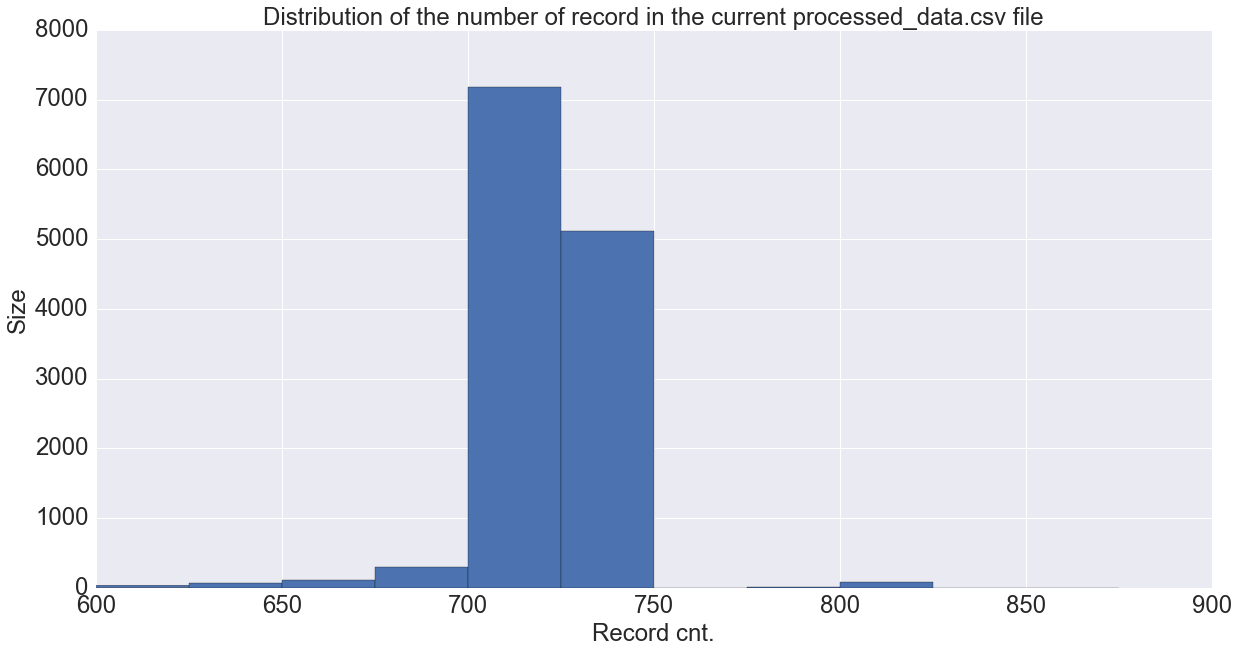

In [3]:
fig = plt.figure(figsize=(20,10))
ax=plt.subplot()
rm.summary_table.cnt_count.hist(bins=np.arange(600,900,25),ax=ax,xlabelsize=24,ylabelsize=24)
ax.set_ylabel('Size',size=24)
ax.set_xlabel('Record cnt.',size=24)
ax.set_title('Distribution of the number of record in the current processed_data.csv file',size=24)

# What is in there ?

The class has an attribute summary_table that contains detail over all the streams.

In [4]:
rm.summary_table.head()

cnt_mean  cnt_max  cnt_min  \
MC                   DO        stream                                   
aberdeen mail centre altens do T0001    5218.440000  26849.0      0.0   
                               T0003    2420.009655   6377.0      0.0   
                               T0030    9479.051105  23377.0      0.0   
                               T0064     316.096953   1772.0      0.0   
                               T0076   33286.088276  71242.0      0.0   

                                            cnt_std  cnt_count    date_min  \
MC                   DO        stream                                        
aberdeen mail centre altens do T0001    3128.807397        725  2014-04-01   
                               T0003     868.695236        725  2014-04-01   
                               T0030    3262.925682        724  2014-04-01   
                               T0064     145.855624        722  2014-04-01   
                               T0076   10416.097466        725  2014-04-01   

                                         date_max  
MC                   DO        stream              
aberdeen mail centre altens do T0001   2016-06-30  
                               T0003   2016-06-30  
                               T0030   2016-06-30  
                               T0064   2016-06-30  
                               T0076   2016-06-30

If you want to look in detail to a MC,DO,stream, use the MailCenter class

In [24]:
aberdeen = MailCenter('aberdeen mail centre',dump=True)

**************************************************
Extracting the data in processed


If you want to generate stats on a specific DO for all the streams, use the
```
object.gen_do_stats
```

In [6]:
aberdeen.gen_DO_stats('altens do')

,count,mean,std,min,25%,50%,75%,max
T0076,725.0,33286.088276,10416.097466,0.0,28715.00,34846.0,39593.00,71242.0
T0030,724.0,9479.051105,3262.925682,0.0,7601.50,9255.5,11309.75,23377.0
T0001,725.0,5218.440000,3128.807397,0.0,3679.00,4424.0,5645.00,26849.0
T0003,725.0,2420.009655,868.695236,0.0,1889.00,2401.0,2998.00,6377.0
T0093,724.0,2161.831492,751.324221,0.0,1771.75,2078.0,2424.25,5770.0
T0092,724.0,1559.787293,542.115358,0.0,1262.75,1498.5,1772.25,4221.0
T0079,726.0,455.915978,227.740754,0.0,314.00,415.5,566.50,2337.0
T0094,724.0,377.247238,137.636123,0.0,303.00,359.0,426.00,1090.0
T0064,722.0,316.096953,145.855624,0.0,291.25,344.0,385.75,1772.0
T0095,724.0,279.935083,101.251791,0.0,228.00,275.0,322.00,811.0


If you want to get info on a specific stream for all DOs in the mail center, say T0095,
```
 object.gen_stream_stats
```


In [7]:
aberdeen.gen_stream_stats(aberdeen.dos,target='stream',name='T0095')

,count,mean,std,min,25%,50%,75%,max
altens do,724.0,279.935083,101.251791,0.0,228.00,275.0,322.00,811.0
mastrick do,724.0,177.279006,71.581035,0.0,140.00,171.0,208.00,595.0
kittybrewster do,724.0,162.792818,58.599597,0.0,130.00,159.0,191.00,452.0
inverurie do,724.0,143.962707,56.553870,0.0,113.75,139.0,165.00,440.0
peterhead do,724.0,118.306630,44.200973,0.0,94.00,115.0,137.00,351.0
bridge of don do,724.0,91.523481,36.651976,0.0,71.00,88.0,106.00,317.0
dyce do,724.0,90.696133,36.040494,0.0,71.00,88.0,106.00,293.0
fraserburgh do,724.0,86.686464,31.908059,0.0,69.75,85.0,100.00,257.0
ellon do,724.0,84.325967,33.053146,0.0,68.00,81.0,96.00,286.0
lerwick do,720.0,78.804167,42.642763,0.0,58.00,72.0,90.25,343.0


So you decide to study a specific stream and you want to know how many record are in there in comparision to what expected ?

In [8]:
aberdeen.compare_expected2given_count('altens do',target='stream',name='T0095')

--------------------------------------------------
The expeted length on 2014 with bank holliday,sunday.. is 275
The length on 2014 is actually 271
--------------------------------------------------
The expeted length on 2015 with bank holliday,sunday.. is 363
The length on 2015 is actually 304
--------------------------------------------------
The expeted length on 2016 with bank holliday,sunday.. is 179
The length on 2016 is actually 149


Ok, now you are happy with number, you'd like to see some plot 

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.40it/s]


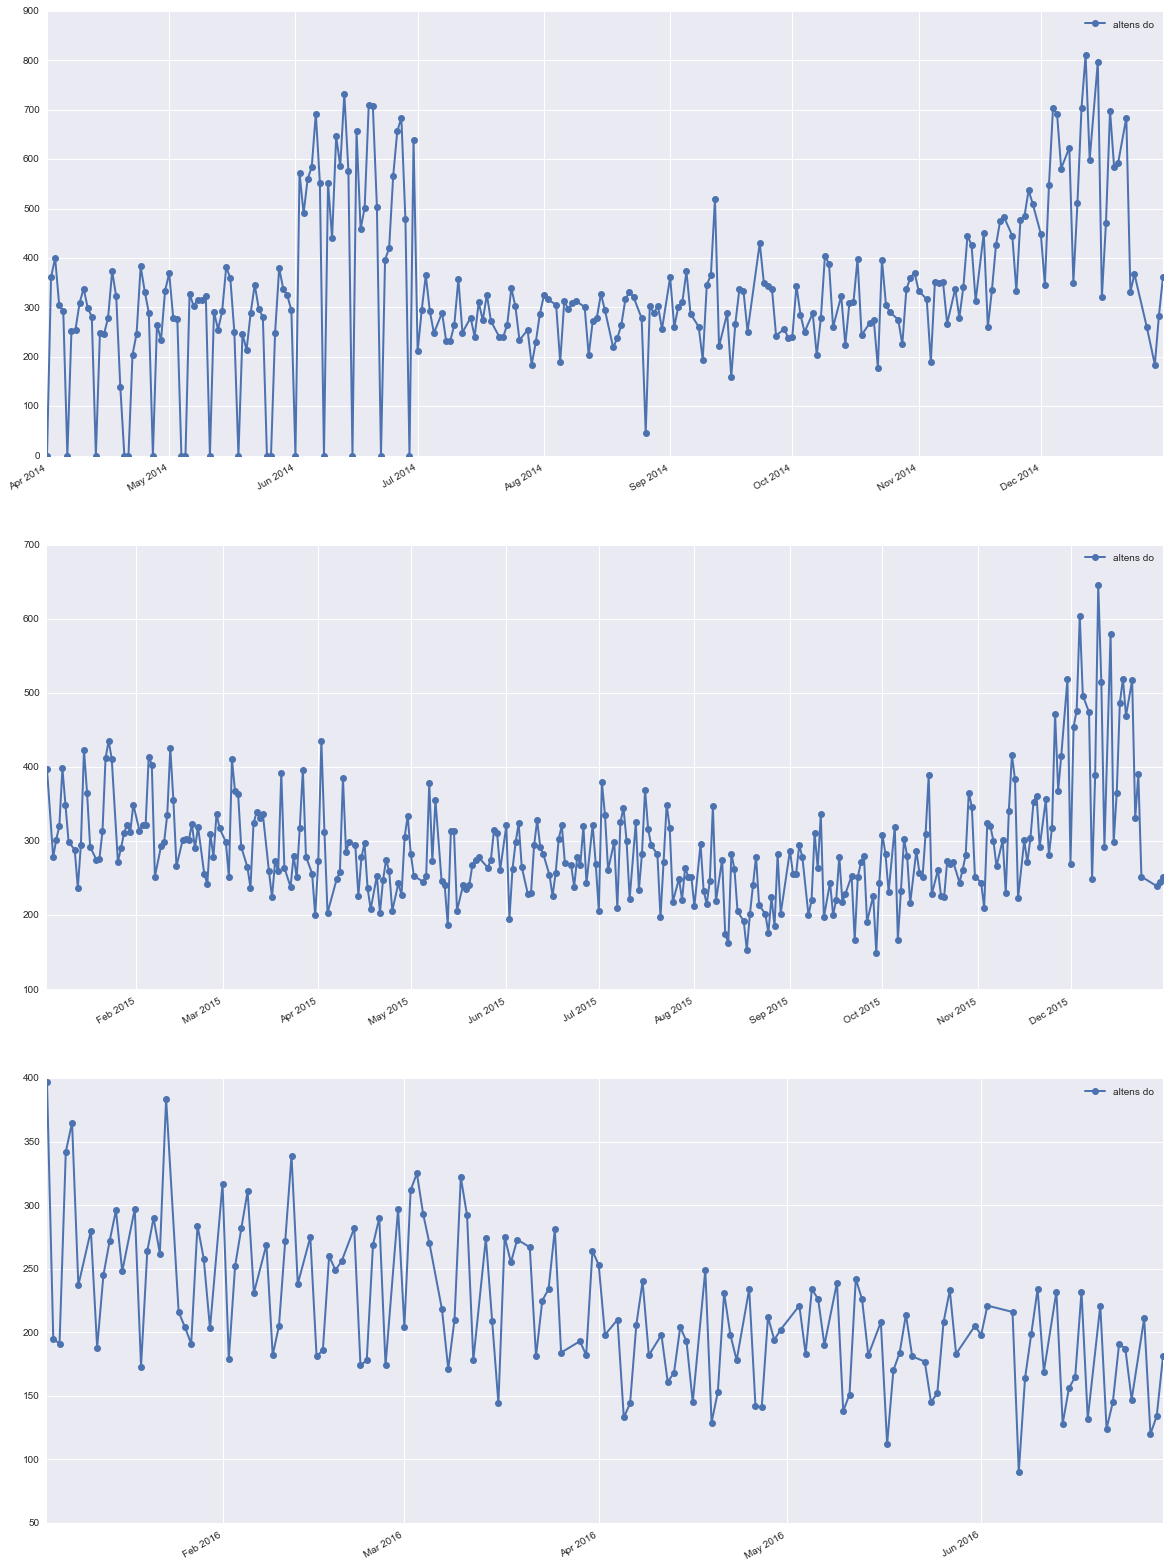

In [9]:
aberdeen.plot_DO('altens do',target='stream',name='T0095')

You can also give him a list of DOs if you want to compare many of them.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.44s/it]


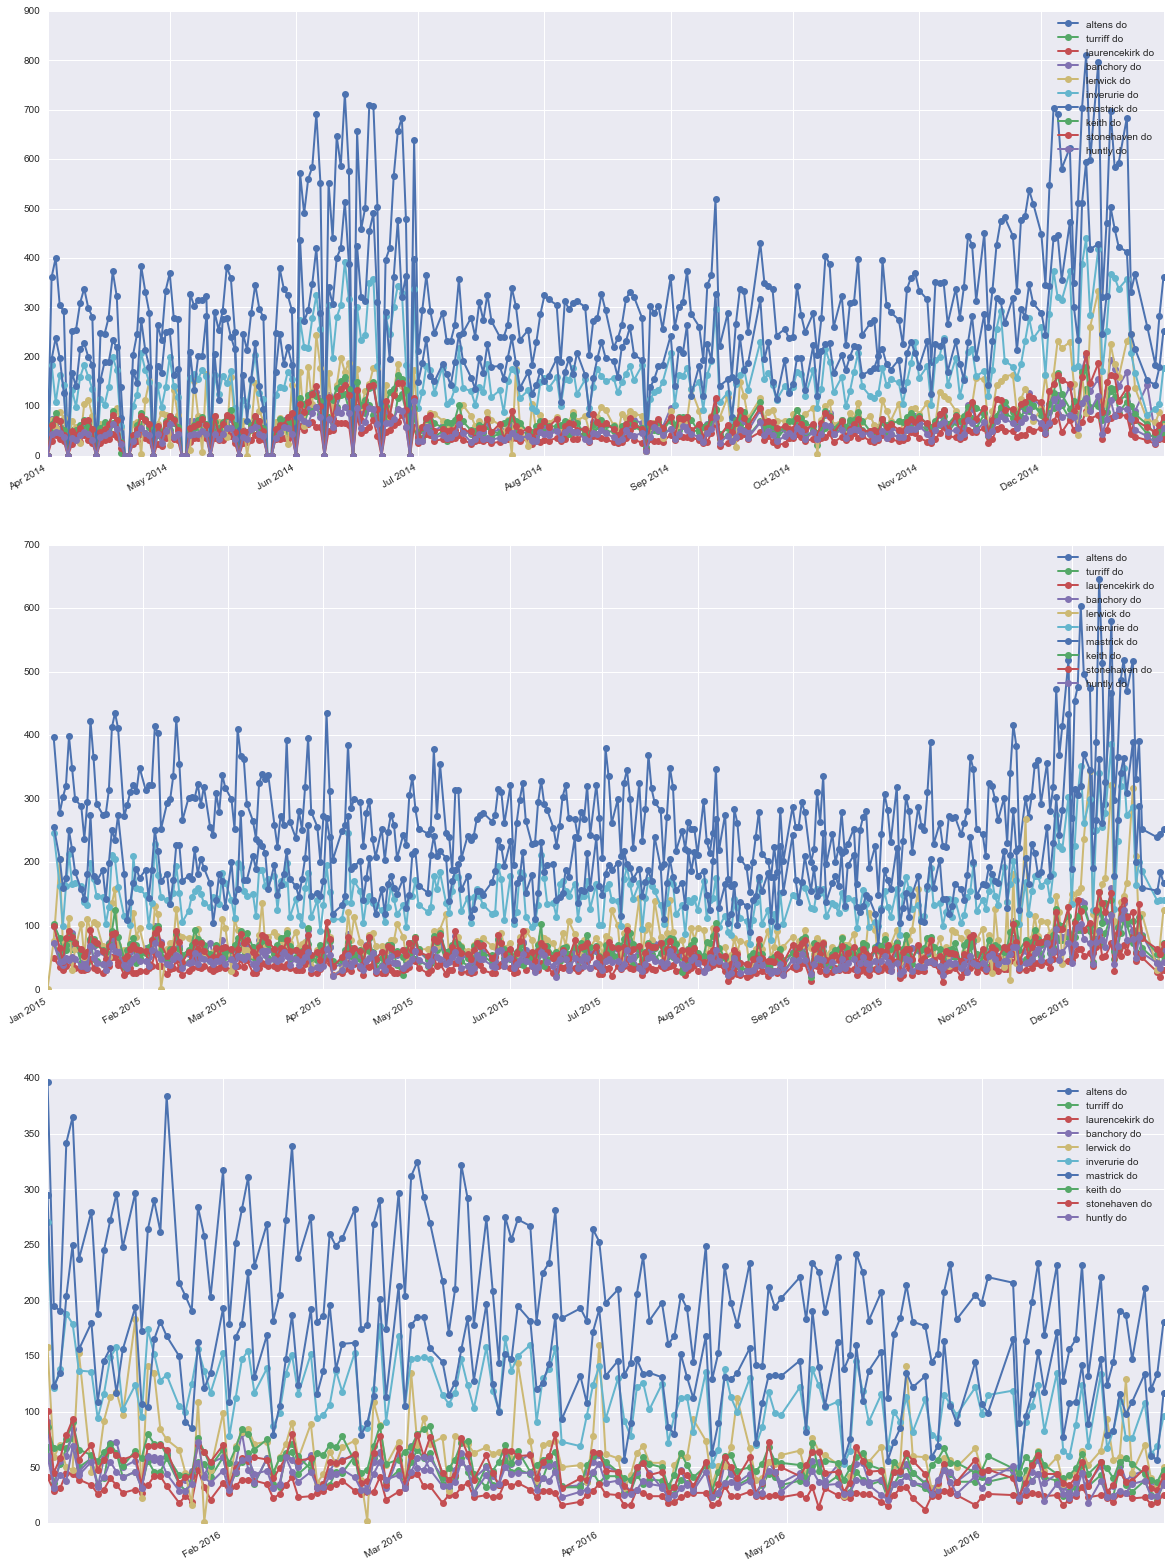

In [10]:
aberdeen.plot_DO(aberdeen.get_random_dos(),target='stream',name='T0095')

and if you still don't like what you see, you can still get the dataframe and work with it.

In [11]:
tmp = aberdeen.get_DO('altens do',target='stream',name='T0095',drop_duplicates=False)
tmp.head()

,stream,mail,MC,DO,cnt,date,day
2014-04-01,T0095,packets,aberdeen mail centre,altens do,0.0,2014-04-01,Tuesday
2014-04-02,T0095,packets,aberdeen mail centre,altens do,361.0,2014-04-02,Wednesday
2014-04-03,T0095,packets,aberdeen mail centre,altens do,400.0,2014-04-03,Thursday
2014-04-04,T0095,packets,aberdeen mail centre,altens do,304.0,2014-04-04,Friday
2014-04-05,T0095,packets,aberdeen mail centre,altens do,292.0,2014-04-05,Saturday


And finally, if you want to plot heatmap, I mean, why not ???

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:03<00:00,  4.96it/s]


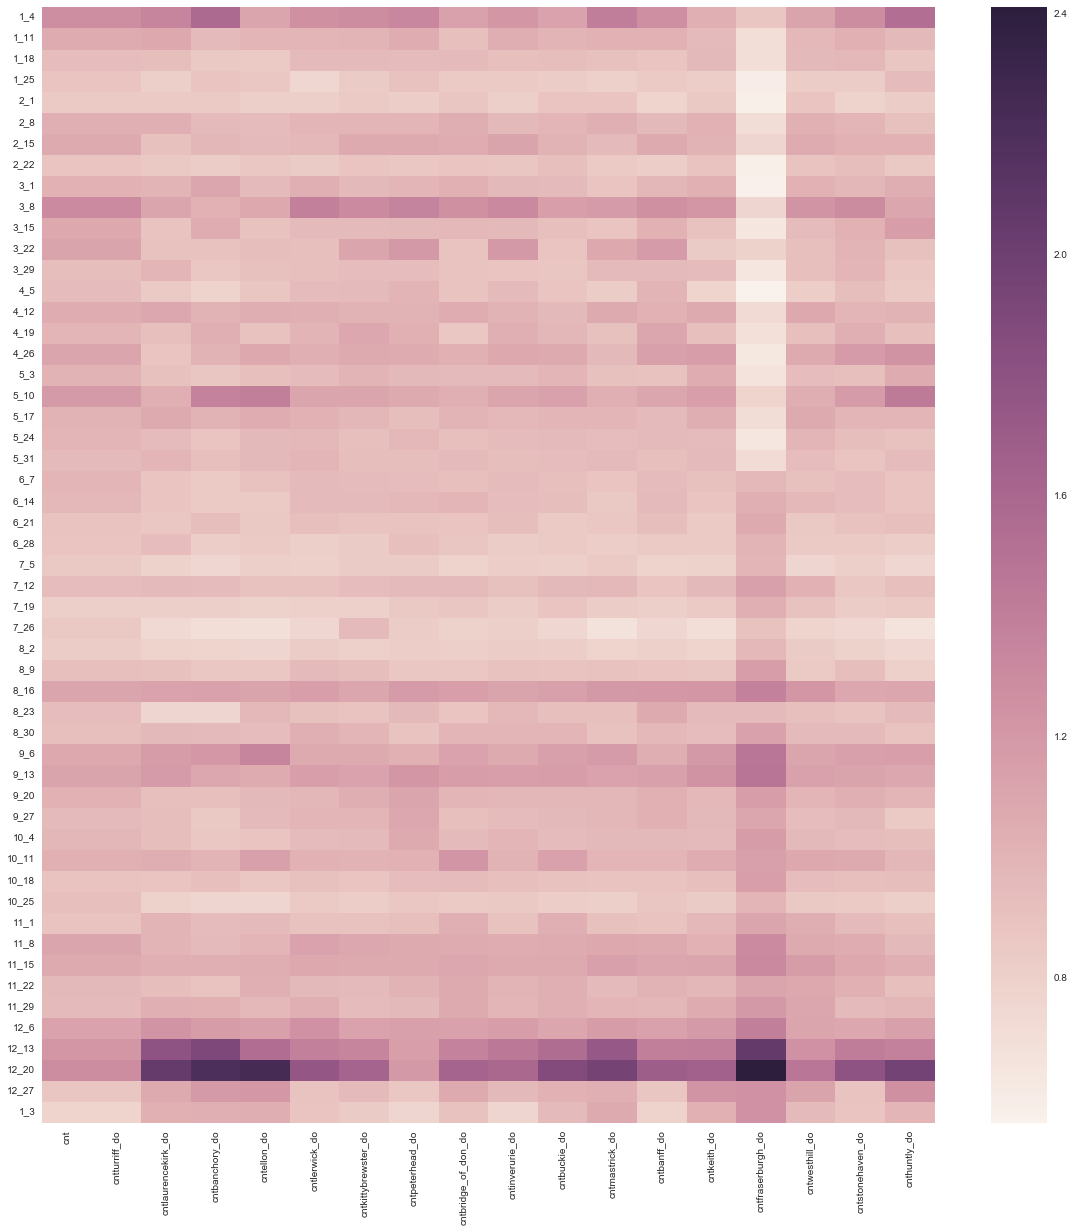

In [12]:
table = aberdeen.plot_heatmap(stream='T0095', year='2015', resample=True)

It returns also a table, so you can explore the table yourself if you want

THE END, FELL FREE TO CHANGE AND COMMIT WHATEVER YOU WANT